<a href="https://colab.research.google.com/github/cszafariqbal/Time_Series_Projects/blob/main/Flu_Patients_visits_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#dataset upload on google colab

In [ ]:
# upload dataset in google colab
from google.colab import files
uploaded = files.upload()

Saving flu-trends.csv to flu-trends.csv


#import the dataset

In [ ]:
# dataset import
import numpy as np
import pandas as pd
flu_trends = pd.read_csv('flu-trends.csv')
flu_trends.head()

,Week,AInfluenza,AcuteBronchitis,BodyTemperature,BraunThermoscan,BreakAFever,Bronchitis,ChestCold,ColdAndFlu,ColdOrFlu,...,TreatingTheFlu,TreatmentForFlu,TreatmentForTheFlu,Tussin,Tussionex,TypeAInfluenza,UpperRespiratory,WalkingPneumonia,WhatToDoIfYouHaveTheFlu,FluVisits
0,2009-06-29/2009-07-05,36,20,43,27,11,22,16,7,3,...,16,6,13,25,34,30,25,24,15,180
1,2009-07-06/2009-07-12,25,19,40,31,10,21,11,6,8,...,16,7,8,27,32,27,28,29,9,115
2,2009-07-13/2009-07-19,24,30,45,20,12,20,20,6,6,...,16,6,9,24,28,25,25,25,9,132
3,2009-07-20/2009-07-26,23,19,40,15,10,19,12,7,10,...,8,5,12,21,26,26,29,24,13,109
4,2009-07-27/2009-08-02,27,21,44,20,11,19,17,8,10,...,8,8,12,33,29,21,27,30,9,120


In [ ]:
# set index
flu_trends.set_index(pd.PeriodIndex(flu_trends.Week, freq="W"),inplace=True)
flu_trends.head()

,Week,AInfluenza,AcuteBronchitis,BodyTemperature,BraunThermoscan,BreakAFever,Bronchitis,ChestCold,ColdAndFlu,ColdOrFlu,...,TreatingTheFlu,TreatmentForFlu,TreatmentForTheFlu,Tussin,Tussionex,TypeAInfluenza,UpperRespiratory,WalkingPneumonia,WhatToDoIfYouHaveTheFlu,FluVisits
Week,,,,,,,,,,,,,,,,,,,,,
2009-06-29/2009-07-05,2009-06-29/2009-07-05,36,20,43,27,11,22,16,7,3,...,16,6,13,25,34,30,25,24,15,180
2009-07-06/2009-07-12,2009-07-06/2009-07-12,25,19,40,31,10,21,11,6,8,...,16,7,8,27,32,27,28,29,9,115
2009-07-13/2009-07-19,2009-07-13/2009-07-19,24,30,45,20,12,20,20,6,6,...,16,6,9,24,28,25,25,25,9,132
2009-07-20/2009-07-26,2009-07-20/2009-07-26,23,19,40,15,10,19,12,7,10,...,8,5,12,21,26,26,29,24,13,109
2009-07-27/2009-08-02,2009-07-27/2009-08-02,27,21,44,20,11,19,17,8,10,...,8,8,12,33,29,21,27,30,9,120


#EDA for Trend & seasonal Plot

In [ ]:
# remove column week from dataset
flu_trends.drop("Week", axis=1, inplace=True)

In [ ]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, date
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)



<ipython-input-16-f30b283128ec>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


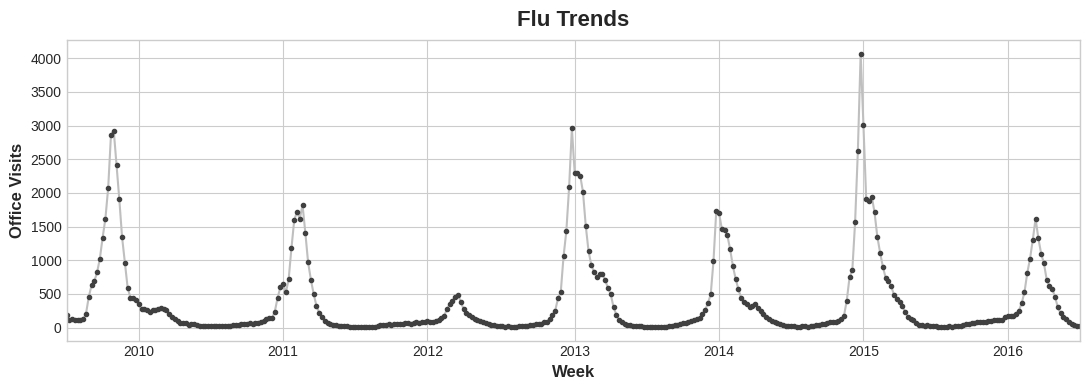

In [ ]:
ax = flu_trends.FluVisits.plot(title='Flu Trends', **plot_params)
_ = ax.set(ylabel="Office Visits")


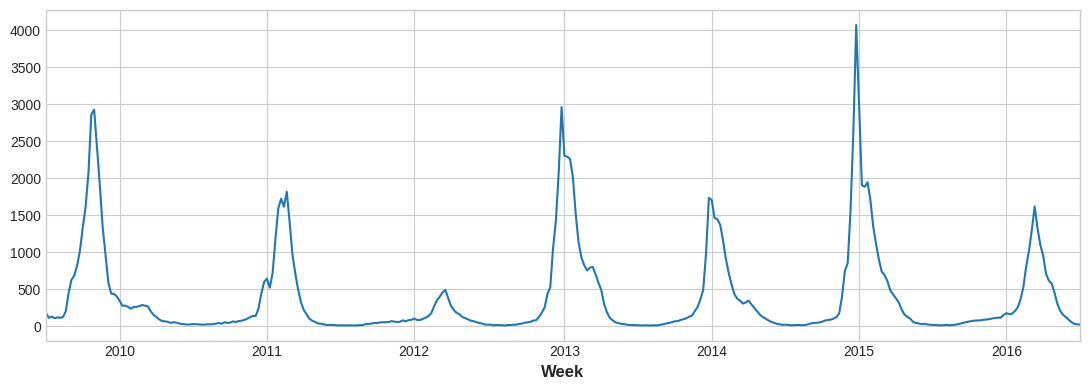

In [ ]:
flu_trends.FluVisits.plot()
plt.show()


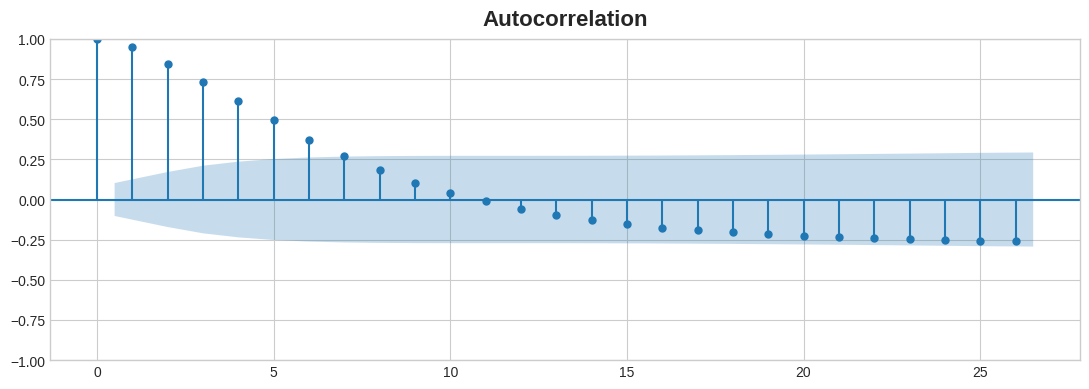

In [ ]:
# plot_acf
plot_acf(flu_trends.FluVisits)
plt.show()

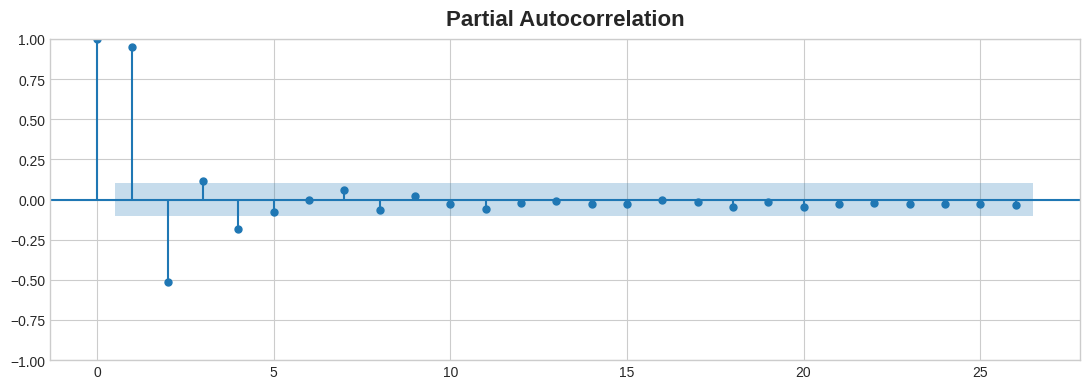

In [ ]:
# plot_pacf
plot_pacf(flu_trends.FluVisits)
plt.show()

#Adf test for check the series is stationary or not stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(flu_trends.FluVisits)
print("ADF Statistics: %f" % results[0])
print("p-value: %f" % results[1])
print("Critical Values: ")
for key , values in results[4].items():
  print( "\t%s: %f" % (key , values))
if (results[1]>0.05):
  print("Series is not stationary")
else:
  print("Series is stationary")

ADF Statistics: -5.607721
p-value: 0.000001
Critical Values: 
	1%: -3.448595
	5%: -2.869580
	10%: -2.571053
Series is stationary


#kpss test for check the series is stationary or not stationary

In [ ]:
# kpss test
results = kpss(flu_trends.FluVisits)
print("ADF Statistics: %f" % results[0])
print("p-value: %f" % results[1])
print("Critical Values: ")
for key , values in results[3].items():
  print( "\t%s: %f" % (key , values))
if (results[1]<0.05):
  print("Series is not stationary")
else:
  print("Series is stationary")

ADF Statistics: 0.047889
p-value: 0.100000
Critical Values: 
	10%: 0.347000
	5%: 0.463000
	2.5%: 0.574000
	1%: 0.739000
Series is stationary


<ipython-input-22-48f08b26e70e>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  results = kpss(flu_trends.FluVisits)


#split dataset into train and test

In [ ]:
# split data for open
split = int(len(flu_trends.FluVisits) * 0.8)
train, test = flu_trends.FluVisits.iloc[:split], flu_trends.FluVisits.iloc[split:]

In [ ]:
len(train), len(test)

(292, 74)

#create ARIMA Model

In [ ]:
# model ariam AR(1)
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train,order=(1,0,0))
results = model.fit()

#prediction and Chech root mean squre error

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions2 = results.predict(start=len(train+1), end= len(train)+len(test)-1, dynamic=False)
predictions1 = results.predict(start=1, end= len(train), dynamic=False)
rmse1 = sqrt(mean_squared_error(train, predictions1))
print('Train RMSE: %.3f' % rmse1)
rmse2 = sqrt(mean_squared_error(test, predictions2))
print('Test RMSE: %.3f' % rmse2)

Train RMSE: 33.514
Test RMSE: 621.988


In [ ]:
# model ariam AR(2)
model=ARIMA(train,order=(2,0,0))
results = model.fit()

predictions2 = results.predict(start=len(train+1), end= len(train)+len(test)-1, dynamic=False)
predictions1 = results.predict(start=1, end= len(train), dynamic=False)
rmse1 = sqrt(mean_squared_error(train, predictions1))
print('Train RMSE: %.3f' % rmse1)
rmse2 = sqrt(mean_squared_error(test, predictions2))
print('Test RMSE: %.3f' % rmse2)

Train RMSE: 112.288
Test RMSE: 379.622


In [ ]:
# model ariam AR(4)
model=ARIMA(train,order=(5,0,0))
results = model.fit()

predictions2 = results.predict(start=len(train+1), end= len(train)+len(test)-1, dynamic=False)
predictions1 = results.predict(start=1, end= len(train), dynamic=False)
rmse1 = sqrt(mean_squared_error(train, predictions1))
print('Train RMSE: %.3f' % rmse1)
rmse2 = sqrt(mean_squared_error(test, predictions2))
print('Test RMSE: %.3f' % rmse2)

Train RMSE: 121.624
Test RMSE: 364.847


In [ ]:
# model ariam ARIMA
model=ARIMA(train,order=(1,1,6))
results = model.fit()

predictions2 = results.predict(start=len(train+1), end= len(train)+len(test)-1, dynamic=False)
predictions1 = results.predict(start=1, end= len(train), dynamic=False)
rmse1 = sqrt(mean_squared_error(train, predictions1))
print('Train RMSE: %.3f' % rmse1)
rmse2 = sqrt(mean_squared_error(test, predictions2))
print('Test RMSE: %.3f' % rmse2)

Train RMSE: 122.168
Test RMSE: 384.782


In [ ]:
# model ariam with seasonal factor
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(4,0,0), seasonal_order=(4,0,0,365))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
predictions = results.predict(start=len(train+1), end= len(train)+len(test)-1, dynamic=False)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 354.734
